In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from scipy.stats import shapiro


In [50]:
tiktok = pd.read_csv('TikTok_songs_2022.csv',index_col=0)
tiktok.shape 

(263, 17)

In [51]:
unpopular = pd.read_csv('unpopular_songs.csv',index_col=0)
unpopular.shape 

(4073, 16)

In [52]:
# both dataframes are not balanced

In [53]:
tiktok

,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
track_name,,,,,,,,,,,,,,,,,
Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,4,298933
As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,4,167303
Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.350000,0.000000,0.1500,0.841,131.430,4,163026
Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.440000,0.000007,0.0921,0.531,80.870,4,238805
About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.099500,0.000000,0.3350,0.722,108.966,4,191822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320
Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720
Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365


In [54]:
tiktok.columns

Index(['artist_name', 'artist_pop', 'album', 'track_pop', 'danceability',
       'energy', 'loudness', 'mode', 'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms'],
      dtype='object')

In [55]:
tiktok.isna().sum()

artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [56]:
tiktok.isnull().sum()

artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [57]:
unpopular

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
danceability,,,,,,,,,,,,,,,,
0.722,0.476,5,-8.203,1,0.0896,0.67000,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
0.955,0.281,0,-11.392,0,0.4660,0.00480,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
0.753,0.355,8,-11.799,1,0.5140,0.57300,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
0.650,0.331,3,-10.818,0,0.3830,0.86500,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
0.690,0.360,4,-15.624,0,0.4550,0.76400,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.862,0.578,10,-9.364,0,0.4430,0.01460,0.0000,0.1190,0.3850,81.059,139442,True,0,No Competition,T-Tomp,35ebaAwvPLjeTVUMQhyyqW
0.686,0.511,8,-10.253,0,0.4350,0.01010,0.0000,0.1100,0.4020,137.768,97440,True,0,Test Me,T-Tomp,5WYoA9mhHWSyHkaGI3qKsO
0.725,0.555,8,-13.018,1,0.3910,0.00189,0.0000,0.1100,0.1390,139.806,91742,True,0,Poof,T-Tomp,7aAsvABCFbZa7FsolZTASW


In [58]:
unpopular.columns

Index(['energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'explicit', 'popularity', 'track_name', 'track_artist', 'track_id'],
      dtype='object')

In [59]:
unpopular.isna().sum()

energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
track_name          0
track_artist        0
track_id            0
dtype: int64

In [60]:
unpopular.isnull().sum()

energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
explicit            0
popularity          0
track_name          0
track_artist        0
track_id            0
dtype: int64

In [61]:
tiktok.dtypes

artist_name          object
artist_pop            int64
album                object
track_pop             int64
danceability        float64
energy              float64
loudness            float64
mode                  int64
key                   int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
duration_ms           int64
dtype: object

In [62]:
unpopular.dtypes

energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
explicit               bool
popularity            int64
track_name           object
track_artist         object
track_id             object
dtype: object

In [63]:
tiktok = tiktok.drop(['artist_name','artist_name', 'artist_pop', 'album', 'track_pop', 'danceability','time_signature'], axis = 1)

In [64]:
unpopular = unpopular.drop(['explicit', 'popularity', 'track_name', 'track_artist', 'track_id'],axis = 1)

In [65]:
tiktok = tiktok.reset_index()

In [66]:
unpopular = unpopular.reindex(columns=['energy','loudness','mode','key','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms'])

In [67]:
unpopular = unpopular.reset_index()

In [68]:
unpopular = unpopular.drop(['danceability'],axis = 1)

In [69]:
tiktok = tiktok.drop(['track_name'],axis = 1)

In [159]:
tiktok.value_counts().sum() #no duplicates - count of values = to length of dataframe

263

In [160]:
unpopular.value_counts().sum() #no duplicates - count of values = to length of dataframe

4073

In [71]:
unpopular

,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.476,-8.203,1,5,0.0896,0.67000,0.0000,0.0926,0.9270,151.968,220549
1,0.281,-11.392,0,0,0.4660,0.00480,0.0595,0.1220,0.0934,127.991,149543
2,0.355,-11.799,1,8,0.5140,0.57300,0.0000,0.0735,0.6000,91.978,130019
3,0.331,-10.818,0,3,0.3830,0.86500,0.0000,0.1050,0.5810,99.513,116193
4,0.360,-15.624,0,4,0.4550,0.76400,0.0000,0.1810,0.1050,89.893,111827
...,...,...,...,...,...,...,...,...,...,...,...
4068,0.578,-9.364,0,10,0.4430,0.01460,0.0000,0.1190,0.3850,81.059,139442
4069,0.511,-10.253,0,8,0.4350,0.01010,0.0000,0.1100,0.4020,137.768,97440
4070,0.555,-13.018,1,8,0.3910,0.00189,0.0000,0.1100,0.1390,139.806,91742
4071,0.534,-8.889,1,1,0.3170,0.00531,0.0000,0.1110,0.3020,82.507,113868


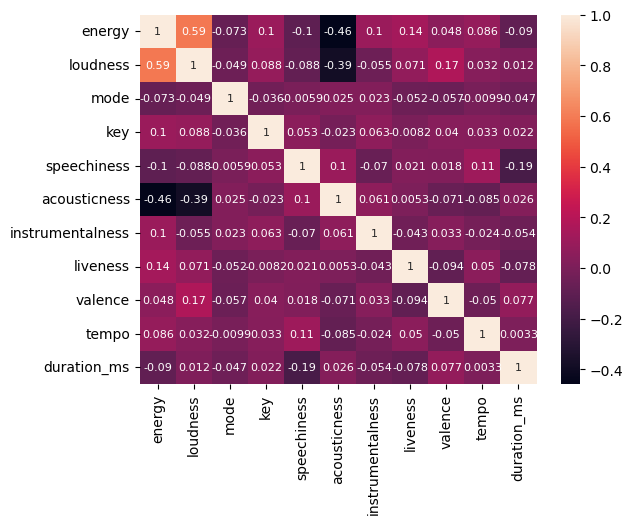

In [125]:
sns.heatmap(tiktok.corr(),annot=True,annot_kws={"size": 8})
plt.show()

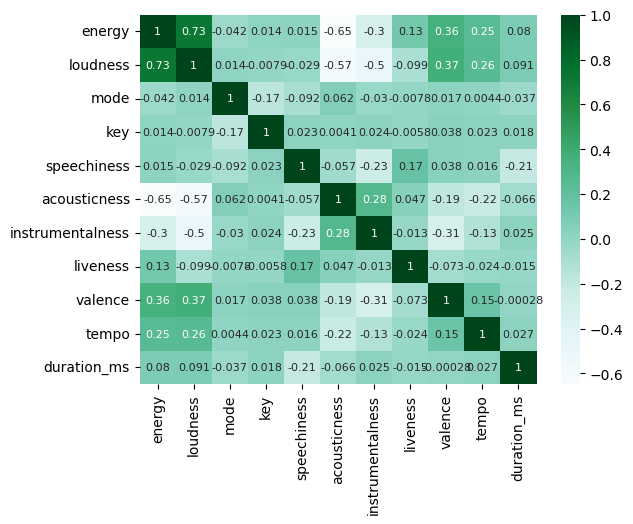

In [126]:
sns.heatmap(unpopular.corr(),cmap="BuGn",annot=True,annot_kws={"size": 8})
plt.show()

In [127]:
# Detected that energy and loudness are correlated and by definition could be considered the same.
# Decided to drop loudness

In [128]:
tiktok = tiktok.drop(['loudness'],axis = 1)
unpopular = unpopular.drop(['loudness'],axis = 1)

In [130]:
tiktok.dtypes

energy              float64
mode                  int64
key                   int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

In [131]:
unpopular.dtypes

energy              float64
mode                  int64
key                   int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

In [137]:
def plot_distribution(tiktok):
    for col in tiktok.columns:
        stat, p = shapiro(tiktok[col])

        if p > 0.05:
            print('The data is normal.')
        else:
            print('The data is likely not normal.')
            
    return tiktok

In [138]:
plot_distribution(tiktok)

The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.


,energy,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.547,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,298933
1,0.731,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,167303
2,0.716,1,10,0.0404,0.350000,0.000000,0.1500,0.841,131.430,163026
3,0.525,1,11,0.0944,0.440000,0.000007,0.0921,0.531,80.870,238805
4,0.743,0,10,0.0656,0.099500,0.000000,0.3350,0.722,108.966,191822
...,...,...,...,...,...,...,...,...,...,...
258,0.740,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,216320
259,0.692,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,233720
260,0.673,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,218365
261,0.558,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,214800


In [139]:
plot_distribution(unpopular)

The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.
The data is likely not normal.


,energy,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.476,1,5,0.0896,0.67000,0.0000,0.0926,0.9270,151.968,220549
1,0.281,0,0,0.4660,0.00480,0.0595,0.1220,0.0934,127.991,149543
2,0.355,1,8,0.5140,0.57300,0.0000,0.0735,0.6000,91.978,130019
3,0.331,0,3,0.3830,0.86500,0.0000,0.1050,0.5810,99.513,116193
4,0.360,0,4,0.4550,0.76400,0.0000,0.1810,0.1050,89.893,111827
...,...,...,...,...,...,...,...,...,...,...
4068,0.578,0,10,0.4430,0.01460,0.0000,0.1190,0.3850,81.059,139442
4069,0.511,0,8,0.4350,0.01010,0.0000,0.1100,0.4020,137.768,97440
4070,0.555,1,8,0.3910,0.00189,0.0000,0.1100,0.1390,139.806,91742
4071,0.534,1,1,0.3170,0.00531,0.0000,0.1110,0.3020,82.507,113868


In [154]:
def plot_distribution(tiktok):
    for col in tiktok.columns:
        sns.histplot(tiktok[col])
        plt.show()
 
            
    return tiktok

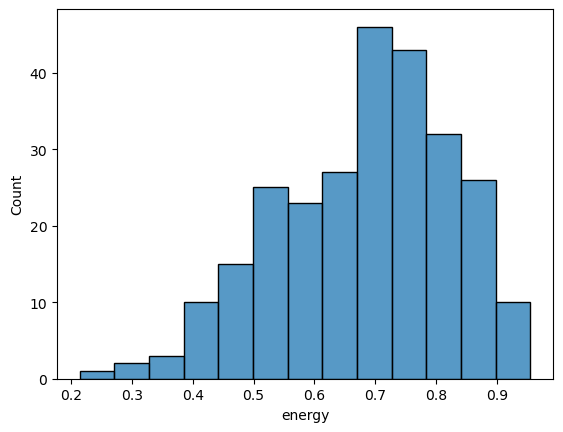

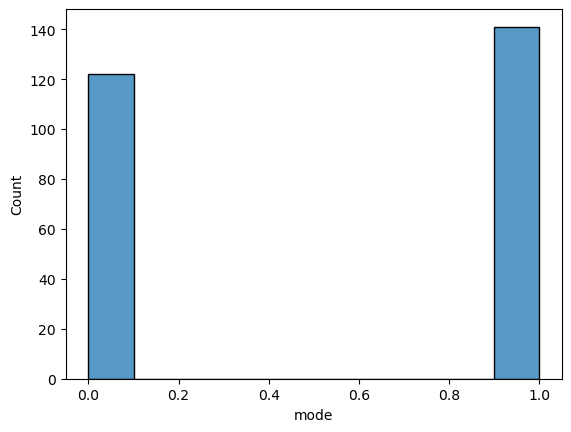

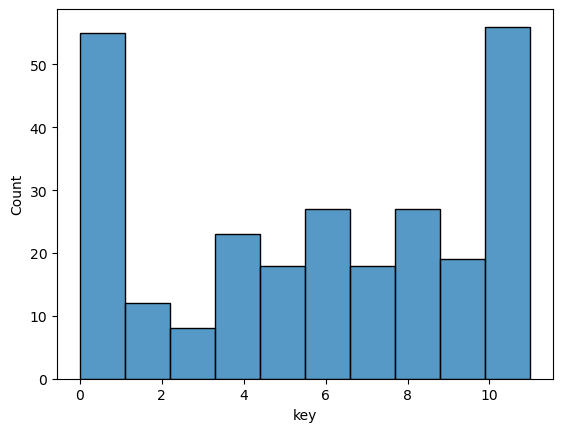

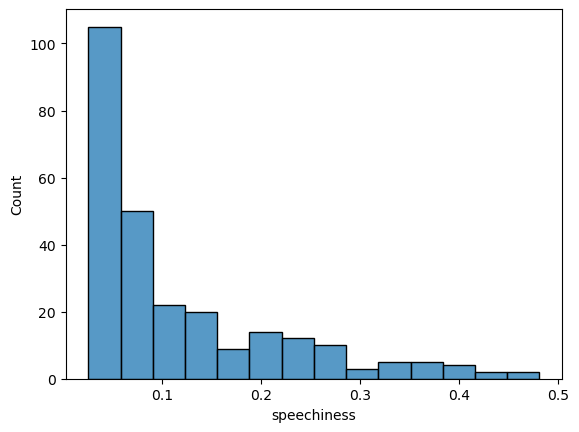

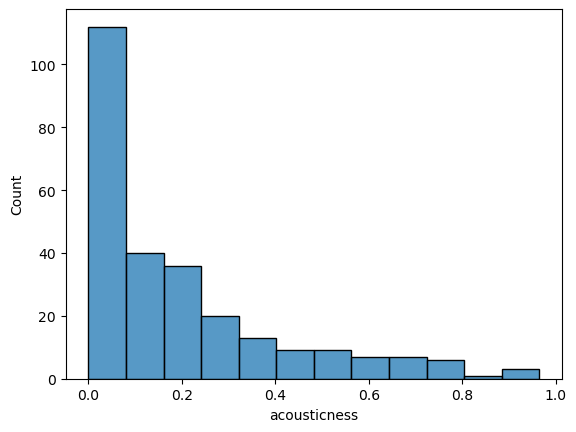

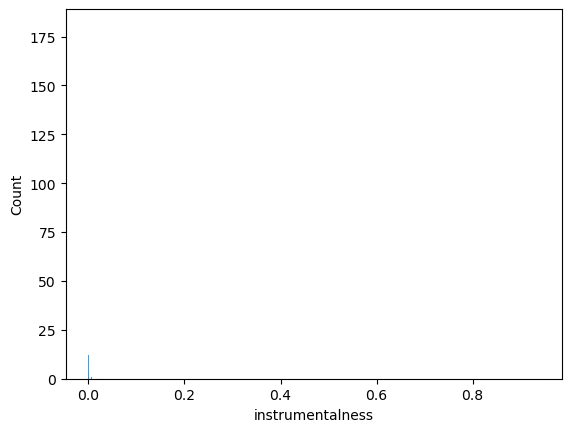

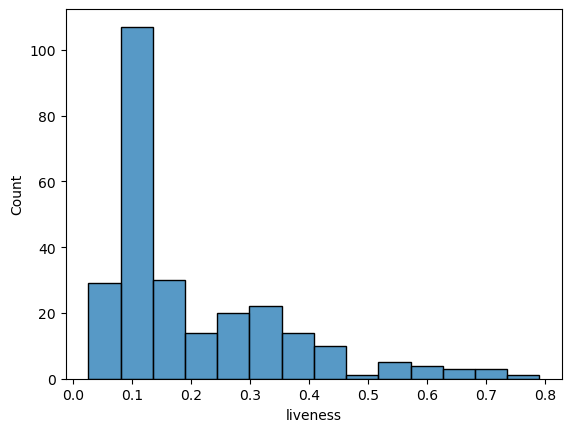

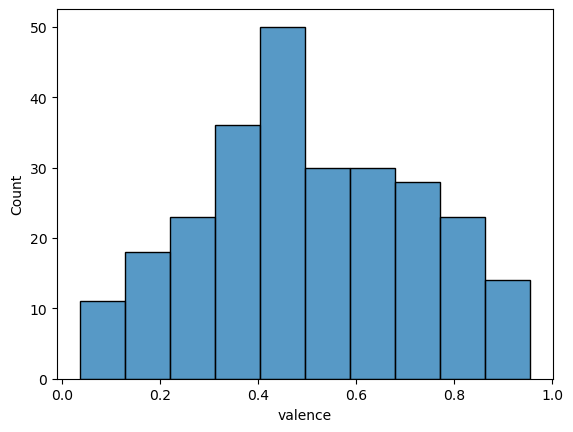

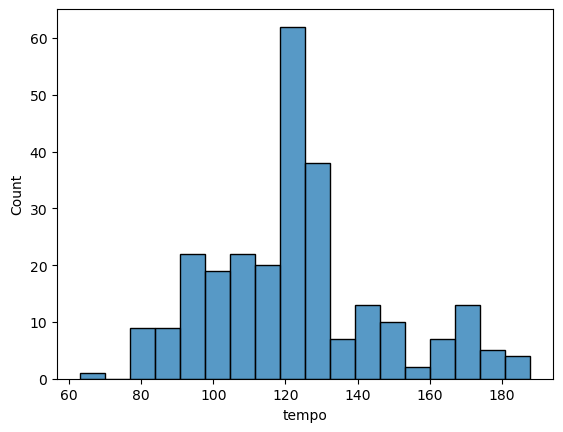

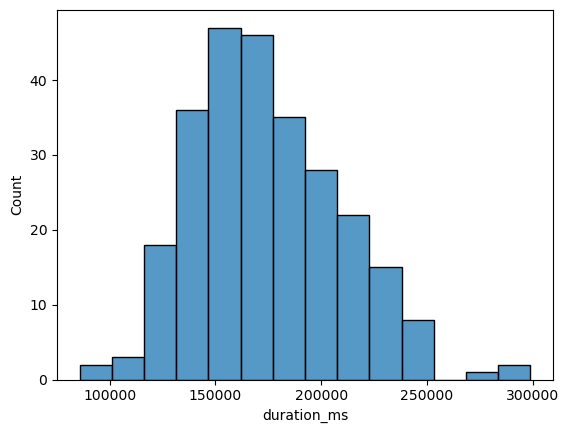

,energy,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.547,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,298933
1,0.731,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,167303
2,0.716,1,10,0.0404,0.350000,0.000000,0.1500,0.841,131.430,163026
3,0.525,1,11,0.0944,0.440000,0.000007,0.0921,0.531,80.870,238805
4,0.743,0,10,0.0656,0.099500,0.000000,0.3350,0.722,108.966,191822
...,...,...,...,...,...,...,...,...,...,...
258,0.740,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,216320
259,0.692,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,233720
260,0.673,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,218365
261,0.558,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,214800


In [155]:
plot_distribution(tiktok)

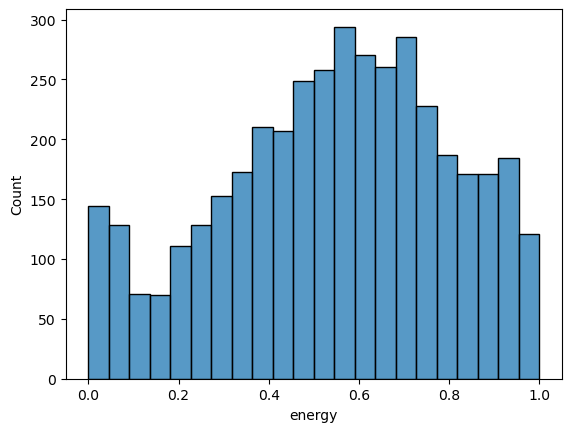

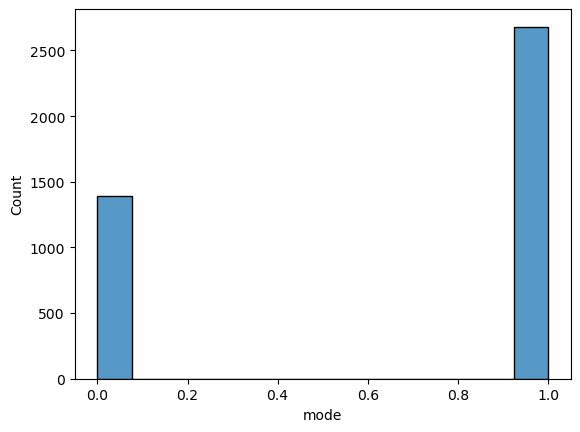

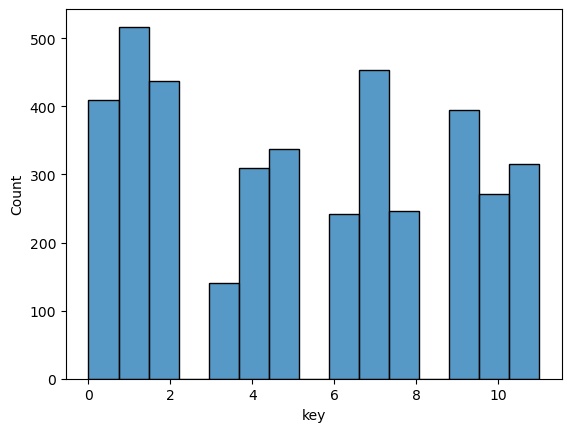

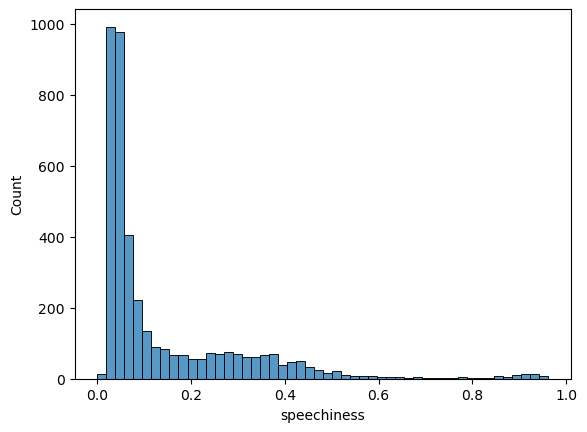

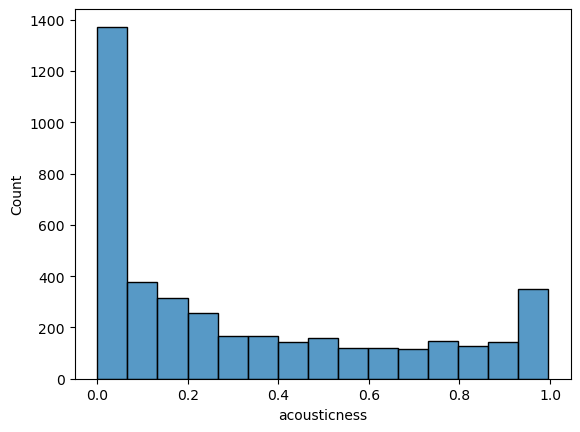

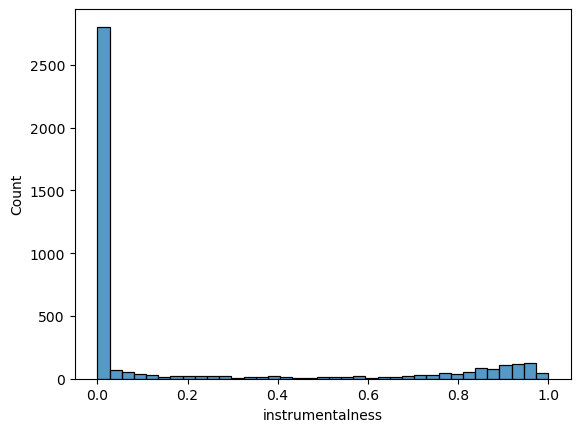

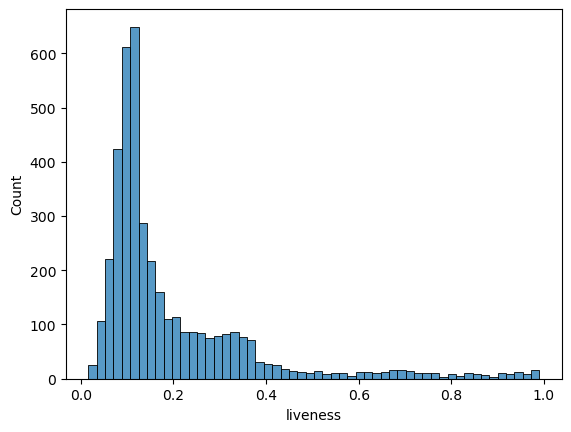

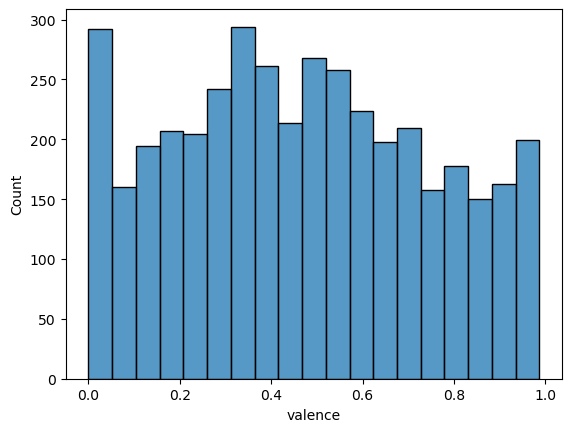

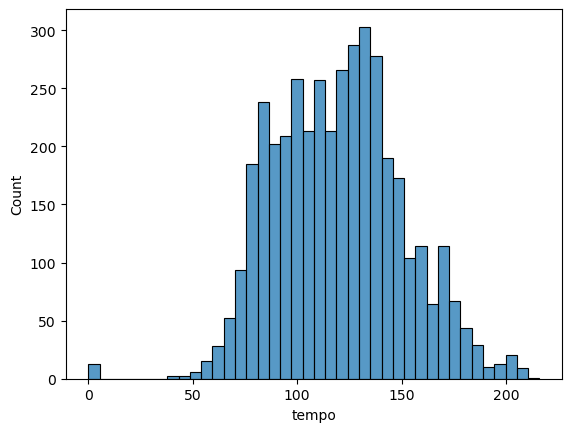

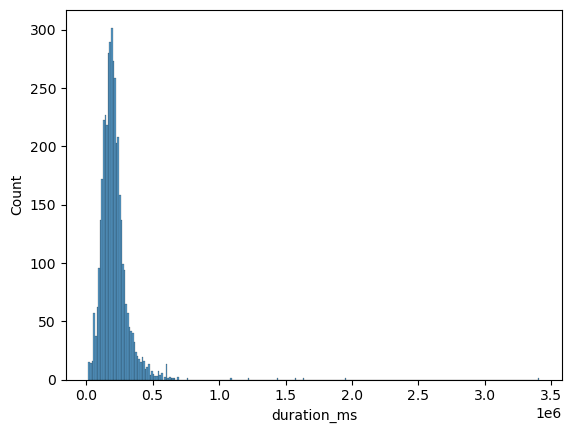

,energy,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.476,1,5,0.0896,0.67000,0.0000,0.0926,0.9270,151.968,220549
1,0.281,0,0,0.4660,0.00480,0.0595,0.1220,0.0934,127.991,149543
2,0.355,1,8,0.5140,0.57300,0.0000,0.0735,0.6000,91.978,130019
3,0.331,0,3,0.3830,0.86500,0.0000,0.1050,0.5810,99.513,116193
4,0.360,0,4,0.4550,0.76400,0.0000,0.1810,0.1050,89.893,111827
...,...,...,...,...,...,...,...,...,...,...
4068,0.578,0,10,0.4430,0.01460,0.0000,0.1190,0.3850,81.059,139442
4069,0.511,0,8,0.4350,0.01010,0.0000,0.1100,0.4020,137.768,97440
4070,0.555,1,8,0.3910,0.00189,0.0000,0.1100,0.1390,139.806,91742
4071,0.534,1,1,0.3170,0.00531,0.0000,0.1110,0.3020,82.507,113868


In [156]:
plot_distribution(unpopular)